In [1]:
# Initial imports

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
sns.set_context("poster")


%matplotlib inline

# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/aman/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load training data
train_data = pd.read_csv('Dataset/Train.csv')

In [3]:
# Load testing data
test_data = pd.read_csv('Dataset/Test.csv')

In [4]:
train_data.columns

Index([u'ID', u'Park_ID', u'Date', u'Direction_Of_Wind',
       u'Average_Breeze_Speed', u'Max_Breeze_Speed', u'Min_Breeze_Speed',
       u'Var1', u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'Footfall'],
      dtype='object')

In [5]:
train_data['Date'] = pd.to_datetime(train_data['Date'], format='%d-%m-%Y')
test_data['Date'] = pd.to_datetime(test_data['Date'], format='%d-%m-%Y')

In [6]:
train_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
0,3311712,12,1990-09-01,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,1406
1,3311812,12,1990-09-02,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,1409
2,3311912,12,1990-09-03,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,1386
3,3312012,12,1990-09-04,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,1365
4,3312112,12,1990-09-05,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,1413


In [7]:
train_data['day'] = train_data['Date'].dt.day
test_data['day'] = test_data['Date'].dt.day
train_data['month'] = train_data['Date'].dt.month
test_data['month'] = test_data['Date'].dt.month
train_data['weekday'] = train_data['Date'].dt.dayofweek
test_data['weekday'] = test_data['Date'].dt.dayofweek

In [8]:
train_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,...,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall,day,month,weekday
0,3311712,12,1990-09-01,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,...,92.0,304.0,255.0,288.0,222.0,3,1406,1,9,5
1,3311812,12,1990-09-02,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,...,172.0,332.0,252.0,297.0,204.0,3,1409,2,9,6
2,3311912,12,1990-09-03,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,...,236.0,292.0,219.0,279.0,165.0,3,1386,3,9,0
3,3312012,12,1990-09-04,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,...,272.0,324.0,225.0,261.0,192.0,3,1365,4,9,1
4,3312112,12,1990-09-05,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,...,236.0,332.0,234.0,273.0,183.0,3,1413,5,9,2


In [9]:
test_data.head()

,ID,Park_ID,Date,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,day,month,weekday
0,3725712,12,2002-01-01,233.0,55.48,76.0,38.0,0.0249,8259.0,8300.0,8211.0,260.0,316.0,243.0,285.0,210.0,3,1,1,1
1,3725812,12,2002-01-02,211.0,108.68,152.0,60.8,154.3800,8208.0,8294.0,8136.0,120.0,280.0,252.0,291.0,201.0,3,2,1,2
2,3725912,12,2002-01-03,237.0,95.76,121.6,83.6,34.8600,8252.0,8304.0,8146.0,236.0,292.0,234.0,270.0,207.0,3,3,1,3
3,3726012,12,2002-01-04,286.0,101.08,129.2,83.6,34.0300,8146.0,8249.0,8092.0,204.0,284.0,228.0,264.0,201.0,3,4,1,4
4,3726112,12,2002-01-05,281.0,63.08,83.6,45.6,4.9800,8341.0,8376.0,8259.0,144.0,316.0,237.0,279.0,213.0,3,5,1,5


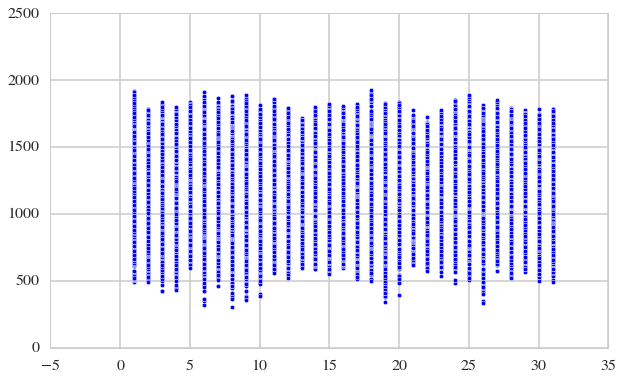

In [10]:
plt.scatter(train_data['day'], train_data['Footfall'])

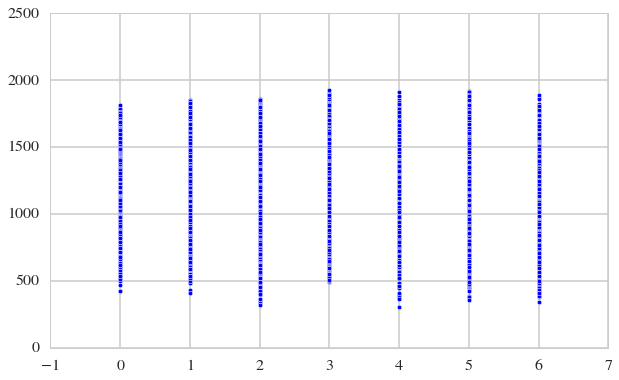

In [11]:
plt.scatter(train_data['weekday'], train_data['Footfall'])

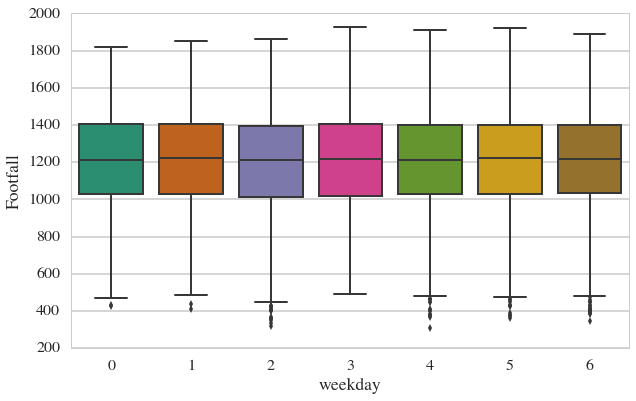

In [12]:
sns.boxplot(y=train_data['Footfall'], x=train_data['weekday'])

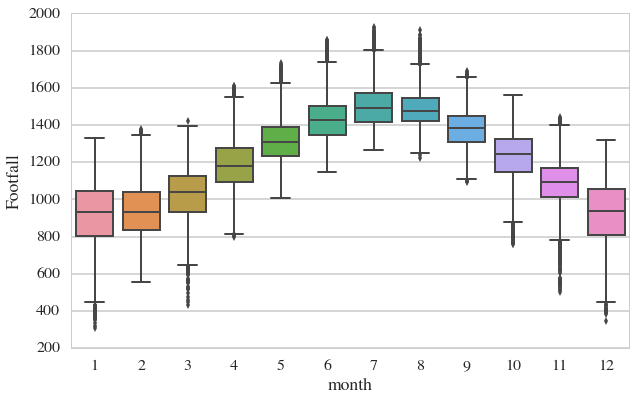

In [13]:
sns.boxplot(y=train_data['Footfall'], x=train_data['month'])

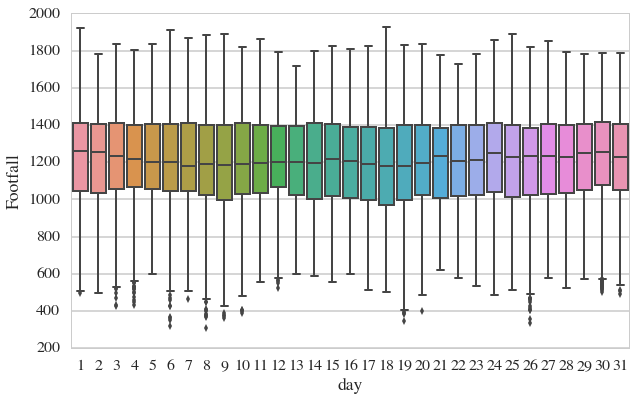

In [14]:
sns.boxplot(y=train_data['Footfall'], x=train_data['day'])

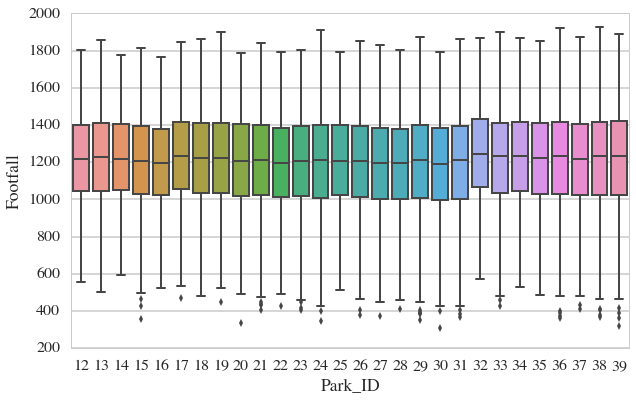

In [15]:
sns.boxplot(y=train_data['Footfall'], x=train_data['Park_ID'])

In [16]:
Y_full = train_data['Footfall']
X_full = train_data.drop('Footfall', axis=1)
X_full = X_full.drop('ID', axis=1)
X_full = X_full.drop('Date', axis=1)
X_full = X_full.drop('day', axis=1)
X_full['month'] = abs(X_full['month'] - 7)

In [17]:
X_full

,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,month,weekday
0,12,194.0,37.24,60.8,15.2,92.1300,8225.0,8259.0,8211.0,92.0,304.0,255.0,288.0,222.0,3,2,5
1,12,285.0,32.68,60.8,7.6,14.1100,8232.0,8280.0,8205.0,172.0,332.0,252.0,297.0,204.0,3,2,6
2,12,319.0,43.32,60.8,15.2,35.6900,8321.0,8355.0,8283.0,236.0,292.0,219.0,279.0,165.0,3,2,0
3,12,297.0,25.84,38.0,7.6,0.0249,8379.0,8396.0,8358.0,272.0,324.0,225.0,261.0,192.0,3,2,1
4,12,207.0,28.88,45.6,7.6,0.8300,8372.0,8393.0,8335.0,236.0,332.0,234.0,273.0,183.0,3,2,2
5,12,243.0,74.48,106.4,45.6,133.6300,8263.0,8331.0,8232.0,140.0,320.0,255.0,285.0,192.0,3,2,3
6,12,241.0,57.76,68.4,38.0,25.7300,8311.0,8331.0,8263.0,132.0,312.0,237.0,294.0,204.0,3,2,4
7,12,227.0,34.20,68.4,15.2,53.1200,8352.0,8376.0,8324.0,88.0,276.0,291.0,297.0,270.0,3,2,5
8,12,211.0,17.48,30.4,7.6,0.0249,8400.0,8413.0,8376.0,152.0,292.0,273.0,297.0,231.0,3,2,6
9,12,221.0,24.32,53.2,7.6,0.0249,8393.0,8410.0,8386.0,16.0,208.0,291.0,300.0,267.0,3,2,0


In [18]:
Y_full.isnull().any()

False

In [19]:
X_full.isnull().any()

Park_ID                         False
Direction_Of_Wind                True
Average_Breeze_Speed             True
Max_Breeze_Speed                 True
Min_Breeze_Speed                 True
Var1                             True
Average_Atmospheric_Pressure     True
Max_Atmospheric_Pressure         True
Min_Atmospheric_Pressure         True
Min_Ambient_Pollution            True
Max_Ambient_Pollution            True
Average_Moisture_In_Park         True
Max_Moisture_In_Park             True
Min_Moisture_In_Park             True
Location_Type                   False
month                           False
weekday                         False
dtype: bool

In [20]:
X_full['Direction_Of_Wind'] = X_full['Direction_Of_Wind'].fillna(X_full['Direction_Of_Wind'].median())

In [21]:
def fill_values(t):
    return t.fillna(t.median()) 

In [22]:
cols = X_full.columns
for col in cols:
    X_full[col] = fill_values(X_full[col])

In [23]:
X_full.isnull().any()

Park_ID                         False
Direction_Of_Wind               False
Average_Breeze_Speed            False
Max_Breeze_Speed                False
Min_Breeze_Speed                False
Var1                            False
Average_Atmospheric_Pressure    False
Max_Atmospheric_Pressure        False
Min_Atmospheric_Pressure        False
Min_Ambient_Pollution           False
Max_Ambient_Pollution           False
Average_Moisture_In_Park        False
Max_Moisture_In_Park            False
Min_Moisture_In_Park            False
Location_Type                   False
month                           False
weekday                         False
dtype: bool

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

In [28]:
rf = RandomForestRegressor()
cross_val_score(rf, X_full, Y_full, scoring='mean_squared_error')

In [29]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_full, Y_full)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [30]:
X_full.columns

Index([u'Park_ID', u'Direction_Of_Wind', u'Average_Breeze_Speed',
       u'Max_Breeze_Speed', u'Min_Breeze_Speed', u'Var1',
       u'Average_Atmospheric_Pressure', u'Max_Atmospheric_Pressure',
       u'Min_Atmospheric_Pressure', u'Min_Ambient_Pollution',
       u'Max_Ambient_Pollution', u'Average_Moisture_In_Park',
       u'Max_Moisture_In_Park', u'Min_Moisture_In_Park', u'Location_Type',
       u'month', u'weekday'],
      dtype='object')

In [33]:
test_pred = test_data[X_full.columns]

In [35]:
cols = test_pred.columns
for col in cols:
    test_pred[col] = fill_values(test_pred[col])

/home/aman/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
prediction = rf.predict(test_pred)

In [37]:
prediction

array([ 1459.74,  1456.29,  1392.67, ...,   867.22,   832.18,   980.4 ])

In [41]:
solution = pd.DataFrame(test_data['ID'])
solution = pd.concat([solution, pd.DataFrame(prediction, columns=['Footfall'])], axis=1)

In [42]:
solution

,ID,Footfall
0,3725712,1459.74
1,3725812,1456.29
2,3725912,1392.67
3,3726012,1350.06
4,3726112,1391.77
5,3726212,1394.24
6,3726312,1450.62
7,3726412,1394.29
8,3726512,1475.04
9,3726612,1421.83


In [43]:
solution.to_csv('solution.csv', index=False)